<a href="https://colab.research.google.com/github/kristacahayani/Project_Analisis-Sentimen-Bank-Jago/blob/main/Project_Analisis_Sentimen_Bank_Jago.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Scraping Data (Pengambilan data ulasan Bank Jago)

In [ ]:
!pip install google_play_scraper
!pip install pandas
!pip install keras

In [ ]:
import pandas as pd
import numpy as np
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'com.jago.digitalBanking',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=500,
    filter_score_with=None
)

In [ ]:
df = pd.DataFrame(np.array(result),columns=['review'])
df = df.join(pd.DataFrame(df.pop('review').tolist()))
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,e268870a-e80a-4595-baa0-216178a38065,Muhamad Fuadi Munzir,https://play-lh.googleusercontent.com/a-/ALV-U...,"Tolong berikan tanda atau kata ""Transfer Berha...",2,15,8.28.0,2023-10-10 09:55:54,None,NaT,8.28.0
1,1783ddfb-a57c-40d3-a8f6-25adaba75316,Hilmanuraziz,https://play-lh.googleusercontent.com/a-/ALV-U...,Susahnya ketika mau login. Harus hapal betul 4...,3,66,8.27.3,2023-09-29 13:16:20,None,NaT,8.27.3
2,2ffd8052-7ecb-4e78-87f6-1b63709e3387,Pipit Pratiwi,https://play-lh.googleusercontent.com/a-/ALV-U...,"Setelah verifikasi video call, eeehhh ga bisa ...",1,137,8.26.0,2023-09-14 06:02:11,None,NaT,8.26.0
3,f81d3067-b2b1-4312-9598-7d3d7a74c9b0,Chandra Pratama,https://play-lh.googleusercontent.com/a-/ALV-U...,"Kalau untuk layanan, transfer, topup e wallet,...",5,4,8.27.3,2023-10-03 05:20:59,None,NaT,8.27.3
4,db5f0d45-7133-44b1-8303-18044b11ab9b,Diva Anggraini,https://play-lh.googleusercontent.com/a/ACg8oc...,"Sdh lama pakek jago, tapi semakin kesini semak...",1,12,8.27.3,2023-09-29 08:15:18,None,NaT,8.27.3


In [ ]:
reviews = df[['score', 'content', 'at']]
reviews.to_csv('bankjago_scrapped_data.csv', index = False)

In [ ]:
reviews

,score,content,at
0,2,"Tolong berikan tanda atau kata ""Transfer Berha...",2023-10-10 09:55:54
1,3,Susahnya ketika mau login. Harus hapal betul 4...,2023-09-29 13:16:20
2,1,"Setelah verifikasi video call, eeehhh ga bisa ...",2023-09-14 06:02:11
3,5,"Kalau untuk layanan, transfer, topup e wallet,...",2023-10-03 05:20:59
4,1,"Sdh lama pakek jago, tapi semakin kesini semak...",2023-09-29 08:15:18
...,...,...,...
495,5,Biarkan bintang berbicara.....proses cepat..go...,2023-09-28 10:46:08
496,5,So far inilah bank digital yang paling terperc...,2023-10-07 02:44:33
497,5,Banyak bonus yang saya dapat..mantap.... Banya...,2023-10-06 11:56:02
498,1,"Sekarang log in susah, padahal semua benar",2023-10-08 00:40:24


In [ ]:
reviews.to_csv('bankjago_scrapped_data.csv')

In [ ]:
bankjago = pd.read_csv('bankjago_scrapped_data.csv')
bankjago

,Unnamed: 0,score,content,at
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berha...",2023-10-10 09:55:54
1,1,3,Susahnya ketika mau login. Harus hapal betul 4...,2023-09-29 13:16:20
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa ...",2023-09-14 06:02:11
3,3,5,"Kalau untuk layanan, transfer, topup e wallet,...",2023-10-03 05:20:59
4,4,1,"Sdh lama pakek jago, tapi semakin kesini semak...",2023-09-29 08:15:18
...,...,...,...,...
495,495,5,Biarkan bintang berbicara.....proses cepat..go...,2023-09-28 10:46:08
496,496,5,So far inilah bank digital yang paling terperc...,2023-10-07 02:44:33
497,497,5,Banyak bonus yang saya dapat..mantap.... Banya...,2023-10-06 11:56:02
498,498,1,"Sekarang log in susah, padahal semua benar",2023-10-08 00:40:24


In [ ]:
bankjago = pd.DataFrame(np.array(result), columns=['content'])
bankjago = bankjago.join(pd.DataFrame(bankjago.pop('content').tolist()))
reviews = bankjago[['score', 'content','at']]

sorteddata = reviews.sort_values(by='at', ascending=True)
sorteddata.head()

,score,content,at
296,5,"Enak pake Jago, transfer ke Gopay tanpa ada bi...",2023-05-19 18:44:36
376,1,🍎 Sering banget ada tulisan Kehilangan Koneksi...,2023-05-21 16:49:18
356,1,"Aplikasi suka lemot, transaksi sering gagal, t...",2023-05-22 14:07:33
301,5,Alhamdulillah Sudah sebulan lebih pakai Jago M...,2023-05-22 16:09:27
321,1,Mohon di hapus semua data saya jangan di sebar...,2023-05-23 03:31:45


In [ ]:
sorteddata['year'] = sorteddata['at'].dt.year
sorteddata['month'] = sorteddata['at'].dt.month
sorteddata['day'] = sorteddata['at'].dt.day
sorteddata

,score,content,at,year,month,day
296,5,"Enak pake Jago, transfer ke Gopay tanpa ada bi...",2023-05-19 18:44:36,2023,5,19
376,1,🍎 Sering banget ada tulisan Kehilangan Koneksi...,2023-05-21 16:49:18,2023,5,21
356,1,"Aplikasi suka lemot, transaksi sering gagal, t...",2023-05-22 14:07:33,2023,5,22
301,5,Alhamdulillah Sudah sebulan lebih pakai Jago M...,2023-05-22 16:09:27,2023,5,22
321,1,Mohon di hapus semua data saya jangan di sebar...,2023-05-23 03:31:45,2023,5,23
...,...,...,...,...,...,...
451,5,Bagus sangat mudah di operasikan. Rekomen deh,2023-10-10 23:50:18,2023,10,10
441,5,Pengalaman saya pake bank jago sudah memuaskan...,2023-10-11 03:35:03,2023,10,11
493,5,pelayanan yang luar biasa transfer detikan pok...,2023-10-11 06:38:47,2023,10,11
484,5,Apk luar biasa sangat membantu saya dalam bert...,2023-10-11 11:15:49,2023,10,11


In [ ]:
bankjago = sorteddata[['score','content','year','month','day']]
bankjago

,score,content,year,month,day
296,5,"Enak pake Jago, transfer ke Gopay tanpa ada bi...",2023,5,19
376,1,🍎 Sering banget ada tulisan Kehilangan Koneksi...,2023,5,21
356,1,"Aplikasi suka lemot, transaksi sering gagal, t...",2023,5,22
301,5,Alhamdulillah Sudah sebulan lebih pakai Jago M...,2023,5,22
321,1,Mohon di hapus semua data saya jangan di sebar...,2023,5,23
...,...,...,...,...,...
451,5,Bagus sangat mudah di operasikan. Rekomen deh,2023,10,10
441,5,Pengalaman saya pake bank jago sudah memuaskan...,2023,10,11
493,5,pelayanan yang luar biasa transfer detikan pok...,2023,10,11
484,5,Apk luar biasa sangat membantu saya dalam bert...,2023,10,11


### Menampilkan rating

In [ ]:
rating_counts = bankjago['score'].value_counts().sort_index()
print(rating_counts)

1    187
2     25
3     36
4     36
5    216
Name: score, dtype: int64


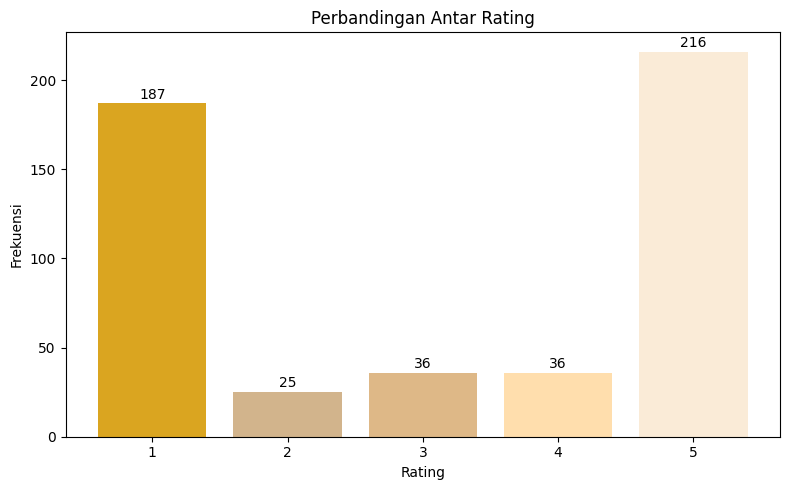

In [ ]:
import matplotlib.pyplot as plt

# Calculate review counts for each rating value
rating_counts = bankjago['score'].value_counts().sort_index()

# Create a bar plot
plt.figure(figsize=(8, 5))
plt.bar(rating_counts.index, rating_counts.values, color=['goldenrod', 'tan', 'burlywood', 'navajowhite', 'antiquewhite'])

plt.xlabel('Rating')
plt.ylabel('Frekuensi')
plt.title('Perbandingan Antar Rating')

# Adding text labels on top of the bars
for x, y in zip(rating_counts.index, rating_counts.values):
    plt.text(x, y + 1, str(y), ha='center', va='bottom')

plt.xticks(rating_counts.index)
plt.tight_layout()

# Show plot
plt.show()

In [ ]:
import pandas as pd
rating_counts_by_month = bankjago.groupby(['month', 'score']).size().unstack(fill_value=0)
print(rating_counts_by_month)

score   1   2   3   4   5
month                    
5       8   0   1   0   8
6      12   4   5   1  22
7      16   0  10   6  16
8      41   4   5  13  52
9      74  10  11   8  76
10     36   7   4   8  42


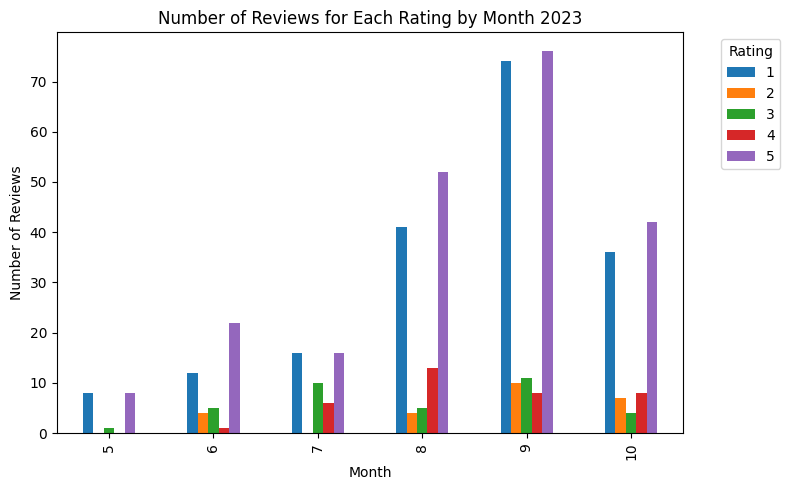

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

rating_counts_by_month = bankjago.groupby(['month', 'score']).size().unstack(fill_value=0)

# Plotting the data
fig, ax = plt.subplots(figsize=(8, 5))
rating_counts_by_month.plot(kind='bar', ax=ax)
plt.xlabel('Month')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews for Each Rating by Month 2023')
plt.legend(title='Rating', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xticks(range(len(rating_counts_by_month)), rating_counts_by_month.index)
plt.tight_layout()
plt.show()

## Pre-processing Data

In [ ]:
bankjago = pd.read_csv('bankjago_scrapped_data.csv')
bankjago

,Unnamed: 0,score,content,at
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berha...",2023-10-10 09:55:54
1,1,3,Susahnya ketika mau login. Harus hapal betul 4...,2023-09-29 13:16:20
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa ...",2023-09-14 06:02:11
3,3,5,"Kalau untuk layanan, transfer, topup e wallet,...",2023-10-03 05:20:59
4,4,1,"Sdh lama pakek jago, tapi semakin kesini semak...",2023-09-29 08:15:18
...,...,...,...,...
495,495,5,Biarkan bintang berbicara.....proses cepat..go...,2023-09-28 10:46:08
496,496,5,So far inilah bank digital yang paling terperc...,2023-10-07 02:44:33
497,497,5,Banyak bonus yang saya dapat..mantap.... Banya...,2023-10-06 11:56:02
498,498,1,"Sekarang log in susah, padahal semua benar",2023-10-08 00:40:24


In [ ]:
reviews = bankjago['content']

In [ ]:
pd.set_option('max_colwidth', None)

In [ ]:
import re,string
import nltk
import csv
import numpy as np
import pandas as pd

- cleaning text

In [ ]:
def cleaning(text):
    # Cleaning operations here
    text = re.sub('[0-9]+', "", text) #Remove numbers
    text = re.sub(r'[\n]+', "", text) #Remove new lines
    text = re.sub(r"^\s+|\s+$", "", text) #Remove leading and trailing spaces in a word using OR sign to delete both
    text = re.sub(r"\s+", " ", text) #Remove multiple spaces between words
    text = re.sub('htpps?"\/\/s+', "", text) #Remove hyperlinks
    text = re.sub(r"\b[a-zA-Z]\b", "", text) #Remove single characters
    text = re.sub('\s+', " ", text) #Remove multiple whitespaces
    text = text.translate(str.maketrans("", "", string.punctuation)) #Remove punctuation
    text = text.replace('\\t', "").replace('\\n', "").replace('\\u', "").replace('\\', "") #Remove tab, new line, backslash
    text = re.sub(r'[^\w\s]', "", text) #Remove punctuation and emojis (remove all beside \w: word and \s: space)
    return text

bankjago['cleandata'] = [cleaning(i) for i in reviews]
reviews = bankjago['cleandata']
bankjago

,Unnamed: 0,score,content,at,cleandata
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berhasil"" Pernah menggunakan transfer sebagai cara pembayaran, tp gak ada tanda transfer berhasil di resi nya, jadi membingungkan. Overall mudah dipakai, tolong tingkatkan lagi",2023-10-10 09:55:54,Tolong berikan tanda atau kata Transfer Berhasil Pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan Overall mudah dipakai tolong tingkatkan lagi
1,1,3,"Susahnya ketika mau login. Harus hapal betul 4 pertanyaan yang disuguhkan dan jangan sampai hilang ""perangkat"" lainnya. Memang proses nya demi keamanan para nasabah, namun seperti pedang bermata dua. Juga costumer service perlu ditingkatkan. Beberapa kali lempar-lemparan operator jika tidak bisa memberikan solusi. Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya, karna sering kedapatan operator sedang sibuk.",2023-09-29 13:16:20,Susahnya ketika mau login Harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya Memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua Juga costumer service perlu ditingkatkan Beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa masuk apk. Bilangnya jaringan gangguan coba beberapa saat lagi. Sampek berjam2. Dan aku udah pake paket data yang kenceng, dan wifi yg kenceng. Tetep aja bilangnya gangguan. HAPUSS DATA SAYA,",2023-09-14 06:02:11,Setelah verifikasi video call eeehhh ga bisa masuk apk Bilangnya jaringan gangguan coba beberapa saat lagi Sampek berjam Dan aku udah pake paket data yang kenceng dan wifi yg kenceng Tetep aja bilangnya gangguan HAPUSS DATA SAYA
3,3,5,"Kalau untuk layanan, transfer, topup e wallet, qris,lancar2 saja. Malah ingin menjadikan mobile banking satu2nya di hp. Yang masih menjadi pertanyaan, level silver jagoan, kok tetap saat menambah kartu, biaya msh 40rb",2023-10-03 05:20:59,Kalau untuk layanan transfer topup wallet qrislancar saja Malah ingin menjadikan mobile banking satunya di hp Yang masih menjadi pertanyaan level silver jagoan kok tetap saat menambah kartu biaya msh rb
4,4,1,"Sdh lama pakek jago, tapi semakin kesini semakin sering pending transaksi, dan penanganan lambat, harus nunggu 24 jam, uang keburu di pakek malah nyangkut seharian, pernah transaksi sukses saldo kepotong, tapi uang gk masuk, rugiiii saya",2023-09-29 08:15:18,Sdh lama pakek jago tapi semakin kesini semakin sering pending transaksi dan penanganan lambat harus nunggu jam uang keburu di pakek malah nyangkut seharian pernah transaksi sukses saldo kepotong tapi uang gk masuk rugiiii saya
...,...,...,...,...,...
495,495,5,Biarkan bintang berbicara.....proses cepat..good job,2023-09-28 10:46:08,Biarkan bintang berbicaraproses cepatgood job
496,496,5,"So far inilah bank digital yang paling terpercaya, promonya asli bukan tipu2. Kami jadi tenang menjadi nasabah bank Jago. Bank digital terpercaya selanjutnya adalah tmrw by uob. Bank digital yang tidak terpercaya adalah bank line. Untuk bank digital kepercayaan itu sangat penting karena deposito kami tidak dijamin LPS. Jika ada disini yg menjadi nasabah bank line mending segera pindahkan dana anda ke bank Jago atau TMRW jika tidak ingin menjadi korban penipuan.",2023-10-07 02:44:33,So far inilah bank digital yang paling terpercaya promonya asli bukan tipu Kami jadi tenang menjadi nasabah bank Jago Bank digital terpercaya selanjutnya adalah tmrw by uob Bank digital yang tidak terpercaya adalah bank line Untuk bank digital kepercayaan itu sangat penting karena deposito kami tidak dijamin LPS Jika ada disini yg menjadi nasabah bank line mending segera pindahkan dana anda ke bank Jago atau TMRW jika tidak ingin menjadi korban penipuan
497,497,5,Banyak bonus yang saya dapat..mantap.... Banyakin. Bonus bonus laiinya,20

- case folding

In [ ]:
def casefoldingTxt(text): #convert all into lower case
  text = text.lower()
  return text

bankjago['casefolding'] = [casefoldingTxt(i) for i in reviews]
reviews = bankjago['casefolding']
bankjago

,Unnamed: 0,score,content,at,cleandata,casefolding
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berhasil"" Pernah menggunakan transfer sebagai cara pembayaran, tp gak ada tanda transfer berhasil di resi nya, jadi membingungkan. Overall mudah dipakai, tolong tingkatkan lagi",2023-10-10 09:55:54,Tolong berikan tanda atau kata Transfer Berhasil Pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan Overall mudah dipakai tolong tingkatkan lagi,tolong berikan tanda atau kata transfer berhasil pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan overall mudah dipakai tolong tingkatkan lagi
1,1,3,"Susahnya ketika mau login. Harus hapal betul 4 pertanyaan yang disuguhkan dan jangan sampai hilang ""perangkat"" lainnya. Memang proses nya demi keamanan para nasabah, namun seperti pedang bermata dua. Juga costumer service perlu ditingkatkan. Beberapa kali lempar-lemparan operator jika tidak bisa memberikan solusi. Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya, karna sering kedapatan operator sedang sibuk.",2023-09-29 13:16:20,Susahnya ketika mau login Harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya Memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua Juga costumer service perlu ditingkatkan Beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya ketika mau login harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua juga costumer service perlu ditingkatkan beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa masuk apk. Bilangnya jaringan gangguan coba beberapa saat lagi. Sampek berjam2. Dan aku udah pake paket data yang kenceng, dan wifi yg kenceng. Tetep aja bilangnya gangguan. HAPUSS DATA SAYA,",2023-09-14 06:02:11,Setelah verifikasi video call eeehhh ga bisa masuk apk Bilangnya jaringan gangguan coba beberapa saat lagi Sampek berjam Dan aku udah pake paket data yang kenceng dan wifi yg kenceng Tetep aja bilangnya gangguan HAPUSS DATA SAYA,setelah verifikasi video call eeehhh ga bisa masuk apk bilangnya jaringan gangguan coba beberapa saat lagi sampek berjam dan aku udah pake paket data yang kenceng dan wifi yg kenceng tetep aja bilangnya gangguan hapuss data saya
3,3,5,"Kalau untuk layanan, transfer, topup e wallet, qris,lancar2 saja. Malah ingin menjadikan mobile banking satu2nya di hp. Yang masih menjadi pertanyaan, level silver jagoan, kok tetap saat menambah kartu, biaya msh 40rb",2023-10-03 05:20:59,Kalau untuk layanan transfer topup wallet qrislancar saja Malah ingin menjadikan mobile banking satunya di hp Yang masih menjadi pertanyaan level silver jagoan kok tetap saat menambah kartu biaya msh rb,kalau untuk layanan transfer topup wallet qrislancar saja malah ingin menjadikan mobile banking satunya di hp yang masih menjadi pertanyaan level silver jagoan kok tetap saat menambah kartu biaya msh rb
4,4,1,"Sdh lama pakek jago, tapi semakin kesini semakin sering pending transaksi, dan penanganan lambat, harus nunggu 24 jam, uang keburu di pakek malah nyangkut seharian, pernah transaksi sukses saldo kepotong, tapi uang gk masuk, rugiiii saya",2023-09-29 08:15:18,Sdh lama pakek jago tapi semakin kesini semakin sering pending transaksi dan penanganan lambat harus nunggu jam uang keburu di pakek malah nyangkut seharian pernah transaksi sukses saldo kepotong tapi uang gk masuk rugiiii saya,sdh lama pakek jago tapi semakin kesini semakin sering pending transaksi dan penanganan lambat harus nunggu jam uang kebur

- remove stopword

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('indonesian')

bankjago['filtering'] = bankjago['casefolding'].apply(lambda x:' '.join
                                                    (x for x in x.split() if x not in stopwords))
reviews = bankjago['filtering']
bankjago

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,Unnamed: 0,score,content,at,cleandata,casefolding,filtering
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berhasil"" Pernah menggunakan transfer sebagai cara pembayaran, tp gak ada tanda transfer berhasil di resi nya, jadi membingungkan. Overall mudah dipakai, tolong tingkatkan lagi",2023-10-10 09:55:54,Tolong berikan tanda atau kata Transfer Berhasil Pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan Overall mudah dipakai tolong tingkatkan lagi,tolong berikan tanda atau kata transfer berhasil pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan overall mudah dipakai tolong tingkatkan lagi,tolong tanda transfer berhasil transfer pembayaran tp gak tanda transfer berhasil resi nya membingungkan overall mudah dipakai tolong tingkatkan
1,1,3,"Susahnya ketika mau login. Harus hapal betul 4 pertanyaan yang disuguhkan dan jangan sampai hilang ""perangkat"" lainnya. Memang proses nya demi keamanan para nasabah, namun seperti pedang bermata dua. Juga costumer service perlu ditingkatkan. Beberapa kali lempar-lemparan operator jika tidak bisa memberikan solusi. Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya, karna sering kedapatan operator sedang sibuk.",2023-09-29 13:16:20,Susahnya ketika mau login Harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya Memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua Juga costumer service perlu ditingkatkan Beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya ketika mau login harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua juga costumer service perlu ditingkatkan beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya login hapal disuguhkan hilang perangkat proses nya keamanan nasabah pedang bermata costumer service ditingkatkan kali lemparlemparan operator solusi layanan telpon dibanyakin kuantitas nya karna kedapatan operator sibuk
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa masuk apk. Bilangnya jaringan gangguan coba beberapa saat lagi. Sampek berjam2. Dan aku udah pake paket data yang kenceng, dan wifi yg kenceng. Tetep aja bilangnya gangguan. HAPUSS DATA SAYA,",2023-09-14 06:02:11,Setelah verifikasi video call eeehhh ga bisa masuk apk Bilangnya jaringan gangguan coba beberapa saat lagi Sampek berjam Dan aku udah pake paket data yang kenceng dan wifi yg kenceng Tetep aja bilangnya gangguan HAPUSS DATA SAYA,setelah verifikasi video call eeehhh ga bisa masuk apk bilangnya jaringan gangguan coba beberapa saat lagi sampek berjam dan aku udah pake paket data yang kenceng dan wifi yg kenceng tetep aja bilangnya gangguan hapuss data saya,verifikasi video call eeehhh ga masuk apk bilangnya jaringan gangguan coba sampek berjam udah pake paket data kenceng wifi yg kenceng tetep aja bilangnya gangguan hapuss data
3,3,5,"Kalau untuk layanan, transfer, topup e wallet, qris,lancar2 saja. Malah ingin menjadikan mobile banking satu2nya di hp. Yang masih menjadi pertanyaan, level silver jagoan, kok tetap saat menambah kartu, biaya msh 40rb",2023-10-03 05:20:59,Kalau untuk layanan transfer topup wallet qrislancar saja Malah ingin menjadikan mobile banking satunya di hp Yang masih menjadi pertanyaan level silver jagoan kok tetap saat menambah kartu biaya msh rb,kalau untuk layanan transfer topup wallet qrislancar saja malah ingin menjadikan mobile banking satunya di hp yang masih menjadi pertanyaan level silver jagoan kok tetap saat menambah kartu biaya msh rb,layanan transfer topup wallet qrislancar menjadikan mobil

- stemming

In [ ]:
!pip install PySastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 210.6/210.6 kB 4.5 MB/s eta 0:00:00


In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmingText(text):
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  return Stemmer.stem(text)

bankjago['stemming'] = bankjago['filtering'].apply(stemmingText)
bankjago

,Unnamed: 0,score,content,at,cleandata,casefolding,filtering,stemming
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berhasil"" Pernah menggunakan transfer sebagai cara pembayaran, tp gak ada tanda transfer berhasil di resi nya, jadi membingungkan. Overall mudah dipakai, tolong tingkatkan lagi",2023-10-10 09:55:54,Tolong berikan tanda atau kata Transfer Berhasil Pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan Overall mudah dipakai tolong tingkatkan lagi,tolong berikan tanda atau kata transfer berhasil pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan overall mudah dipakai tolong tingkatkan lagi,tolong tanda transfer berhasil transfer pembayaran tp gak tanda transfer berhasil resi nya membingungkan overall mudah dipakai tolong tingkatkan,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat
1,1,3,"Susahnya ketika mau login. Harus hapal betul 4 pertanyaan yang disuguhkan dan jangan sampai hilang ""perangkat"" lainnya. Memang proses nya demi keamanan para nasabah, namun seperti pedang bermata dua. Juga costumer service perlu ditingkatkan. Beberapa kali lempar-lemparan operator jika tidak bisa memberikan solusi. Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya, karna sering kedapatan operator sedang sibuk.",2023-09-29 13:16:20,Susahnya ketika mau login Harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya Memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua Juga costumer service perlu ditingkatkan Beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya ketika mau login harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua juga costumer service perlu ditingkatkan beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya login hapal disuguhkan hilang perangkat proses nya keamanan nasabah pedang bermata costumer service ditingkatkan kali lemparlemparan operator solusi layanan telpon dibanyakin kuantitas nya karna kedapatan operator sibuk,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa masuk apk. Bilangnya jaringan gangguan coba beberapa saat lagi. Sampek berjam2. Dan aku udah pake paket data yang kenceng, dan wifi yg kenceng. Tetep aja bilangnya gangguan. HAPUSS DATA SAYA,",2023-09-14 06:02:11,Setelah verifikasi video call eeehhh ga bisa masuk apk Bilangnya jaringan gangguan coba beberapa saat lagi Sampek berjam Dan aku udah pake paket data yang kenceng dan wifi yg kenceng Tetep aja bilangnya gangguan HAPUSS DATA SAYA,setelah verifikasi video call eeehhh ga bisa masuk apk bilangnya jaringan gangguan coba beberapa saat lagi sampek berjam dan aku udah pake paket data yang kenceng dan wifi yg kenceng tetep aja bilangnya gangguan hapuss data saya,verifikasi video call eeehhh ga masuk apk bilangnya jaringan gangguan coba sampek berjam udah pake paket data kenceng wifi yg kenceng tetep aja bilangnya gangguan hapuss data,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data
3,3,5,"Kalau untuk layanan, transfer, topup e wallet, qris,lancar2 saja. Malah ingin menjadikan mobile banking satu2nya di hp. Yang masih menjadi pertanyaan, level silver jagoan, kok tetap saat menambah kartu, biay

- tokenizing

In [ ]:
nltk.download('punkt')
from nltk.tokenize import word_tokenize

bankjago['tokenizing'] = bankjago['stemming'].apply(nltk.word_tokenize)
reviews = bankjago['tokenizing']
bankjago

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,Unnamed: 0,score,content,at,cleandata,casefolding,filtering,stemming,tokenizing
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berhasil"" Pernah menggunakan transfer sebagai cara pembayaran, tp gak ada tanda transfer berhasil di resi nya, jadi membingungkan. Overall mudah dipakai, tolong tingkatkan lagi",2023-10-10 09:55:54,Tolong berikan tanda atau kata Transfer Berhasil Pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan Overall mudah dipakai tolong tingkatkan lagi,tolong berikan tanda atau kata transfer berhasil pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan overall mudah dipakai tolong tingkatkan lagi,tolong tanda transfer berhasil transfer pembayaran tp gak tanda transfer berhasil resi nya membingungkan overall mudah dipakai tolong tingkatkan,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,"[tolong, tanda, transfer, hasil, transfer, bayar, tp, gak, tanda, transfer, hasil, resi, nya, bingung, overall, mudah, pakai, tolong, tingkat]"
1,1,3,"Susahnya ketika mau login. Harus hapal betul 4 pertanyaan yang disuguhkan dan jangan sampai hilang ""perangkat"" lainnya. Memang proses nya demi keamanan para nasabah, namun seperti pedang bermata dua. Juga costumer service perlu ditingkatkan. Beberapa kali lempar-lemparan operator jika tidak bisa memberikan solusi. Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya, karna sering kedapatan operator sedang sibuk.",2023-09-29 13:16:20,Susahnya ketika mau login Harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya Memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua Juga costumer service perlu ditingkatkan Beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya ketika mau login harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua juga costumer service perlu ditingkatkan beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya login hapal disuguhkan hilang perangkat proses nya keamanan nasabah pedang bermata costumer service ditingkatkan kali lemparlemparan operator solusi layanan telpon dibanyakin kuantitas nya karna kedapatan operator sibuk,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,"[susah, login, hapal, suguh, hilang, perangkat, proses, nya, aman, nasabah, pedang, mata, costumer, service, tingkat, kali, lemparlemparan, operator, solusi, layan, telpon, dibanyakin, kuantitas, nya, karna, dapat, operator, sibuk]"
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa masuk apk. Bilangnya jaringan gangguan coba beberapa saat lagi. Sampek berjam2. Dan aku udah pake paket data yang kenceng, dan wifi yg kenceng. Tetep aja bilangnya gangguan. HAPUSS DATA SAYA,",2023-09-14 06:02:11,Setelah verifikasi video call eeehhh ga bisa masuk apk Bilangnya jaringan gangguan coba beberapa saat lagi Sampek berjam Dan aku udah pake paket data yang kenceng dan wifi yg kenceng Tetep aja bilangnya gangguan HAPUSS DATA SAYA,setelah verifikasi video call eeehhh ga bisa masuk apk bilangnya jaringan gangguan coba beberapa saat lagi sampek berjam dan aku udah pake paket data yang kenceng dan wifi yg kenceng tetep aja bilangnya gangguan hapuss data saya,verifikasi video call eeehhh ga masuk apk bilangnya jaringan gangguan coba sampek berjam udah pake paket data kenceng wifi yg kenceng tetep aja bilangnya gangg

In [ ]:
#menggabungkan hasil tokenasi dengan remove punct
def remove_punct(text):
  text = " ".join([char for char in text if char not in string.punctuation])
  return text

bankjago['dataClean'] = bankjago['tokenizing'].apply(lambda x: remove_punct(x))
bankjago

,Unnamed: 0,score,content,at,cleandata,casefolding,filtering,stemming,tokenizing,dataClean
0,0,2,"Tolong berikan tanda atau kata ""Transfer Berhasil"" Pernah menggunakan transfer sebagai cara pembayaran, tp gak ada tanda transfer berhasil di resi nya, jadi membingungkan. Overall mudah dipakai, tolong tingkatkan lagi",2023-10-10 09:55:54,Tolong berikan tanda atau kata Transfer Berhasil Pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan Overall mudah dipakai tolong tingkatkan lagi,tolong berikan tanda atau kata transfer berhasil pernah menggunakan transfer sebagai cara pembayaran tp gak ada tanda transfer berhasil di resi nya jadi membingungkan overall mudah dipakai tolong tingkatkan lagi,tolong tanda transfer berhasil transfer pembayaran tp gak tanda transfer berhasil resi nya membingungkan overall mudah dipakai tolong tingkatkan,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,"[tolong, tanda, transfer, hasil, transfer, bayar, tp, gak, tanda, transfer, hasil, resi, nya, bingung, overall, mudah, pakai, tolong, tingkat]",tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat
1,1,3,"Susahnya ketika mau login. Harus hapal betul 4 pertanyaan yang disuguhkan dan jangan sampai hilang ""perangkat"" lainnya. Memang proses nya demi keamanan para nasabah, namun seperti pedang bermata dua. Juga costumer service perlu ditingkatkan. Beberapa kali lempar-lemparan operator jika tidak bisa memberikan solusi. Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya, karna sering kedapatan operator sedang sibuk.",2023-09-29 13:16:20,Susahnya ketika mau login Harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya Memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua Juga costumer service perlu ditingkatkan Beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi Lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya ketika mau login harus hapal betul pertanyaan yang disuguhkan dan jangan sampai hilang perangkat lainnya memang proses nya demi keamanan para nasabah namun seperti pedang bermata dua juga costumer service perlu ditingkatkan beberapa kali lemparlemparan operator jika tidak bisa memberikan solusi lalu untuk layanan telpon masih kurang dibanyakin kuantitas nya karna sering kedapatan operator sedang sibuk,susahnya login hapal disuguhkan hilang perangkat proses nya keamanan nasabah pedang bermata costumer service ditingkatkan kali lemparlemparan operator solusi layanan telpon dibanyakin kuantitas nya karna kedapatan operator sibuk,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,"[susah, login, hapal, suguh, hilang, perangkat, proses, nya, aman, nasabah, pedang, mata, costumer, service, tingkat, kali, lemparlemparan, operator, solusi, layan, telpon, dibanyakin, kuantitas, nya, karna, dapat, operator, sibuk]",susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk
2,2,1,"Setelah verifikasi video call, eeehhh ga bisa masuk apk. Bilangnya jaringan gangguan coba beberapa saat lagi. Sampek berjam2. Dan aku udah pake paket data yang kenceng, dan wifi yg kenceng. Tetep aja bilangnya gangguan. HAPUSS DATA SAYA,",2023-09-14 06:02:11,Setelah verifikasi video call eeehhh ga bisa masuk apk Bilangnya jaringan gangguan coba beberapa saat lagi Sampek berjam Dan aku udah pake paket data yang kenceng dan wifi yg kenceng Tetep aja bilangnya gangguan HAPUSS DATA SAYA,setelah verifikasi video call eeehhh ga bisa masuk a

In [ ]:
#remove kolom
bankjago.drop(bankjago.columns[[0, 2, 3, 4, 5, 6, 7, 8]], axis=1, inplace=True)
bankjago.tail()

,score,dataClean
495,5,biar bintang berbicaraproses cepatgood job
496,5,so far bank digital percaya promonya asli tipu tenang nasabah bank jago bank digital percaya tmrw by uob bank digital percaya bank line bank digital percaya deposito jamin lps yg nasabah bank line mending pindah dana bank jago tmrw korban tipu
497,5,bonus dapatmantap banyakin bonus bonus lai
498,1,log in susah
499,1,daftar masuk suruh daftar


In [ ]:
# File hasil Pre-Processing
bankjago.to_csv('preprocessing_jago.csv')

import pandas as pd

#membaca dan menyimpan file csv sebagai df
jago_df = pd.read_csv('preprocessing_jago.csv')
jago_df.tail()

,Unnamed: 0,score,dataClean
495,495,5,biar bintang berbicaraproses cepatgood job
496,496,5,so far bank digital percaya promonya asli tipu tenang nasabah bank jago bank digital percaya tmrw by uob bank digital percaya bank line bank digital percaya deposito jamin lps yg nasabah bank line mending pindah dana bank jago tmrw korban tipu
497,497,5,bonus dapatmantap banyakin bonus bonus lai
498,498,1,log in susah
499,499,1,daftar masuk suruh daftar


In [ ]:
# Check for missing values in the 'dataClean' column
missing_values = jago_df['dataClean'].isnull().sum()
print("Number of missing values:", missing_values)

Number of missing values: 0


In [ ]:
jago_df.dtypes

Unnamed: 0     int64
score          int64
dataClean     object
dtype: object

In [ ]:
#merubah tipe kolom dataClean dari object menjadi string
jago_df['dataClean'] = jago_df['dataClean'].astype('str')
jago_df['dataClean'] = jago_df['dataClean'].astype(pd.StringDtype())
jago_df.dtypes

Unnamed: 0     int64
score          int64
dataClean     string
dtype: object

In [ ]:
# File hasil Pre-Processing
bankjago.to_csv('preprocessing_jago.csv')

## Pelabelan TEXT BLOB

In [ ]:
from textblob import TextBlob

def get_polarity(text):
    return TextBlob(text).sentiment.polarity

# Apply the get_polarity function to calculate polarity
jago_df['polarity'] = jago_df['dataClean'].apply(get_polarity)

# Create the 'sentiment_textblob' column and categorize sentiment
jago_df['sentiment_textblob'] = ''
jago_df.loc[jago_df['polarity'] > 0, 'sentiment_textblob'] = 'positif'
jago_df.loc[jago_df['polarity'] == 0, 'sentiment_textblob'] = 'netral'
jago_df.loc[jago_df['polarity'] < 0, 'sentiment_textblob'] = 'negatif'

In [ ]:
jago_df[['dataClean', 'polarity', 'sentiment_textblob']].head()

,dataClean,polarity,sentiment_textblob
0,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,0.0,netral
1,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,0.0,netral
2,suka kritik mohon baik hasil transaksi nya beli token listrik dll tolong history transaksi yg mudah akses tampil sulit ecek info transaksi beli token listrik dll tampil menu bayar tampil utama beli token listrik dll harua telusur menu bayar nya,0.0,netral
3,bayar pake kartu kreditdebit jarang banget yg sukses sistem tolol banget suruh konfirmasi transaksi konfirmasi iya bayar gk jelas bayar gak dilanjutin cm terang autentikasi hasil ya bayar tolol user ngapain nggk gin,0.0,netral
4,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data,0.0,netral


In [ ]:
sentiment_counts = jago_df['sentiment_textblob'].value_counts()

print(sentiment_counts)

netral     426
positif     56
negatif     18
Name: sentiment_textblob, dtype: int64


## Pelabelan Lexicon Based

- ubah ke dalam bahasa inggris, karena metode lexicon based hanya dapat membaca kalimat bahasa inggris

In [ ]:
#installing google translate
!pip install googletrans==3.1.0a0

import googletrans
from googletrans import Translator

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.5 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=cc223cad54c386bde9911fcaa7b60366b927fb1f2ad487622340d813f594b2d6
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling cha

In [ ]:
!pip install retrying
from retrying import retry
from googletrans import Translator

translator = Translator()

@retry(wait_fixed=2000, stop_max_attempt_number=3)
def translate_with_retry(translator, text):
    return translator.translate(text, src='id', dest='en').text

In [ ]:
import pandas as pd
from googletrans import Translator
from retrying import retry

# Define a retry decorator
@retry(wait_fixed=2000, stop_max_attempt_number=3)  # Retry with a 2-second delay, up to 3 attempts
def translate_with_retry(translator, text):
    return translator.translate(text, src='id', dest='en').text

# Read the CSV file
jago_df = pd.read_csv('preprocessing_jago.csv')

# Initialize the translator
translator = Translator()

# Translate the data using retry logic
translated_data = []

for text in jago_df['dataClean']:
    try:
        translated_text = translate_with_retry(translator, text)
        translated_data.append(translated_text)
    except Exception as e:
        print(f"Translation failed for '{text}': {str(e)}")
        translated_data.append('Translation Failed')

# Add translated data to the DataFrame
jago_df['dataClean_english'] = translated_data

# Save the DataFrame to a CSV file
jago_df.to_csv('preprocessing_jago_translated.csv', index=False)

# Display the DataFrame
print(jago_df)

     Unnamed: 0  score  \
0             0      2   
1             1      3   
2             2      1   
3             3      5   
4             4      1   
..          ...    ...   
495         495      5   
496         496      5   
497         497      5   
498         498      1   
499         499      1   

                                                                                                                                                                                                                                               dataClean  \
0                                                                                                                             tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat   
1                                             susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi

In [ ]:
jago_df.tail()

,Unnamed: 0,score,dataClean,dataClean_english
495,495,5,biar bintang berbicaraproses cepatgood job,Bintang beer talks fast process good job
496,496,5,so far bank digital percaya promonya asli tipu tenang nasabah bank jago bank digital percaya tmrw by uob bank digital percaya bank line bank digital percaya deposito jamin lps yg nasabah bank line mending pindah dana bank jago tmrw korban tipu,"So far, digital bank believes that the promo is genuine, it's a scam, calm down, digital bank jago customers trust tmrw by uob, digital bank trusts bank line, digital bank trusts deposits guarantee LPS for bank line customers, it's better to transfer funds to bank jago tmrw, victims of deception"
497,497,5,bonus dapatmantap banyakin bonus bonus lai,bonuses can be steady with lots of other bonuses
498,498,1,log in susah,Difficult to log in
499,499,1,daftar masuk suruh daftar,"sign in, tell me to register"


- preprocessing setelah melakukan proses translate

In [ ]:
reviews = jago_df['dataClean_english']

In [ ]:
#merubah tipe kolom dataClean dari object menjadi string
jago_df['dataClean_english'] = jago_df['dataClean_english'].astype('str')
jago_df['dataClean_english'] = jago_df['dataClean_english'].astype(pd.StringDtype())
jago_df.dtypes

Unnamed: 0            int64
score                 int64
dataClean            object
dataClean_english    string
dtype: object

In [ ]:
def cleaning_new(text):
    # Cleaning operations here
    text = text.lower()
    text = re.sub('[0-9]+', "", text) #Remove numbers
    text = re.sub(r'[\n]+', "", text) #Remove new lines
    text = re.sub(r"^\s+|\s+$", "", text) #Remove leading and trailing spaces in a word using OR sign to delete both
    text = re.sub(r"\s+", " ", text) #Remove multiple spaces between words
    text = re.sub('htpps?"\/\/s+', "", text) #Remove hyperlinks
    text = re.sub(r"\b[a-zA-Z]\b", "", text) #Remove single characters
    text = re.sub('\s+', " ", text) #Remove multiple whitespaces
    text = text.translate(str.maketrans("", "", string.punctuation)) #Remove punctuation
    text = text.replace('\\t', "").replace('\\n', "").replace('\\u', "").replace('\\', "") #Remove tab, new line, backslash
    text = re.sub(r'[^\w\s]', "", text) #Remove punctuation and emojis (remove all beside \w: word and \s: space)
    return text

jago_df['dataClean_english'] = [cleaning_new(i) for i in reviews]
reviews = jago_df['dataClean_english']
jago_df.head()

,Unnamed: 0,score,dataClean,dataClean_english
0,0,2,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,please indicate the transfer of payment transfer results but there is no transfer receipt receipt confused overall easy to use please rate
1,1,3,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,difficult to log in memorize lost device process is safe customer eye sword customer service level number of operator throws telephone service solution increased quantity because the operator can be busy
2,2,1,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data,verify video call eeehhh not coming through apk says network is interfering try until the clock is already using fast data package fast wifi still says interfering delete data
3,3,5,layan transfer topup wallet qrislancar jadi mobile banking satu hp level silver jago tambah kartu biaya msh rb,qris ewallet top up transfer service is smooth so mobile banking for one silver level cellphone is good at adding card for up to rp
4,4,1,sdh pakek jago kesini pending transaksi tangan lambat nunggu jam uang keburu pakek nyangkut hari transaksi sukses saldo potong uang gk masuk rugiiii,ve already used good hand come here pending transactions slow hands waiting for the clock the money is in hurry stuck the day the transaction is successful the balance is deducted the money doesn come in there no loss


In [ ]:
#filtering
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords = stopwords.words('indonesian')

jago_df['dataClean_english'] = jago_df['dataClean_english'].apply(lambda x:' '.join
(x for x in x.split() if x not in stopwords))

reviews = jago_df['dataClean_english']
jago_df.head(2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Unnamed: 0,score,dataClean,dataClean_english
0,0,2,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,please indicate the transfer of payment transfer results but there is no transfer receipt receipt confused overall easy to use please rate
1,1,3,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,difficult to log in memorize lost device process is safe customer eye sword customer service level number of operator throws telephone service solution increased quantity because the operator can be busy


In [ ]:
#stemming
!pip install PySastrawi

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemmingText(text):
  factory = StemmerFactory()
  Stemmer = factory.create_stemmer()
  return Stemmer.stem(text)

jago_df['dataClean_english'] = jago_df['dataClean_english'].apply(stemmingText)
jago_df.head()

,Unnamed: 0,score,dataClean,dataClean_english
0,0,2,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,please indicate the transfer of payment transfer results but there is no transfer receipt receipt confused overall easy to use please rate
1,1,3,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,difficult to log in memorize lost device process is safe customer eye sword customer service level number of operator throws telephone service solution increased quantity because the operator can be busy
2,2,1,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data,verify video call eeehhh not coming through apk says network is interfering try until the clock is already using fast data package fast wifi still says interfering delete data
3,3,5,layan transfer topup wallet qrislancar jadi mobile banking satu hp level silver jago tambah kartu biaya msh rb,qris ewallet top up transfer service is smooth so mobile banking for one silver level cellphone is good at adding card for up to rp
4,4,1,sdh pakek jago kesini pending transaksi tangan lambat nunggu jam uang keburu pakek nyangkut hari transaksi sukses saldo potong uang gk masuk rugiiii,ve already used good hand come here pending transactions slow hands waiting for the clock the money is in hurry stuck the day the transaction is successful the balance is deducted the money doesn come in there no loss


In [ ]:
# Save the DataFrame to a CSV file
jago_df.to_csv('preprocessing_jago_translated1.csv', index=False)

- Pelabelan Lexicon Based

In [ ]:
!pip install vaderSentiment

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.7 MB/s eta 0:00:00


In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
import pandas as pd
jago_df = pd.read_csv('preprocessing_jago_translated1.csv')
jago_df = jago_df.dropna()
jago_df.head()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


,Unnamed: 0,score,dataClean,dataClean_english
0,0,2,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,please indicate the transfer of payment transfer results but there is no transfer receipt receipt confused overall easy to use please rate
1,1,3,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,difficult to log in memorize lost device process is safe customer eye sword customer service level number of operator throws telephone service solution increased quantity because the operator can be busy
2,2,1,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data,verify video call eeehhh not coming through apk says network is interfering try until the clock is already using fast data package fast wifi still says interfering delete data
3,3,5,layan transfer topup wallet qrislancar jadi mobile banking satu hp level silver jago tambah kartu biaya msh rb,qris ewallet top up transfer service is smooth so mobile banking for one silver level cellphone is good at adding card for up to rp
4,4,1,sdh pakek jago kesini pending transaksi tangan lambat nunggu jam uang keburu pakek nyangkut hari transaksi sukses saldo potong uang gk masuk rugiiii,ve already used good hand come here pending transactions slow hands waiting for the clock the money is in hurry stuck the day the transaction is successful the balance is deducted the money doesn come in there no loss


In [ ]:
sentiments = SentimentIntensityAnalyzer()
jago_df['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in jago_df['dataClean_english']]
jago_df['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in jago_df['dataClean_english']]
jago_df['Compound'] = [sentiments.polarity_scores(i)['compound'] for i in jago_df['dataClean_english']]
jago_df

,Unnamed: 0,score,dataClean,dataClean_english,Positive,Negative,Compound
0,0,2,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,please indicate the transfer of payment transfer results but there is no transfer receipt receipt confused overall easy to use please rate,0.271,0.184,0.4019
1,1,3,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,difficult to log in memorize lost device process is safe customer eye sword customer service level number of operator throws telephone service solution increased quantity because the operator can be busy,0.224,0.125,0.4215
2,2,1,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data,verify video call eeehhh not coming through apk says network is interfering try until the clock is already using fast data package fast wifi still says interfering delete data,0.000,0.000,0.0000
3,3,5,layan transfer topup wallet qrislancar jadi mobile banking satu hp level silver jago tambah kartu biaya msh rb,qris ewallet top up transfer service is smooth so mobile banking for one silver level cellphone is good at adding card for up to rp,0.170,0.000,0.5719
4,4,1,sdh pakek jago kesini pending transaksi tangan lambat nunggu jam uang keburu pakek nyangkut hari transaksi sukses saldo potong uang gk masuk rugiiii,ve already used good hand come here pending transactions slow hands waiting for the clock the money is in hurry stuck the day the transaction is successful the balance is deducted the money doesn come in there no loss,0.200,0.132,0.6597
...,...,...,...,...,...,...,...
495,495,5,biar bintang berbicaraproses cepatgood job,bintang beer talks fast process good job,0.326,0.000,0.4404
496,496,5,so far bank digital percaya promonya asli tipu tenang nasabah bank jago bank digital percaya tmrw by uob bank digital percaya bank line bank digital percaya deposito jamin lps yg nasabah bank line mending pindah dana bank jago tmrw korban tipu,so far digital bank believes that the promo is genuine it scam calm down digital bank jago customers trust tmrw by uob digital bank trusts bank line digital bank trusts deposits guarantee lps for bank line customers it better to transfer funds to bank jago tmrw victims of deception,0.255,0.136,0.7783
497,497,5,bonus dapatmantap banyakin bonus bonus lai,bonuses can be steady with lots of other bonuses,0.507,0.000,0.8020
498,498,1,log in susah,difficult to log in,0.000,0.455,-0.3612


In [ ]:
score = jago_df['Compound'].values
sentiment = []

for i in score:
    if i > 0:
        sentiment.append('positif')
    elif i < 0:
        sentiment.append('negatif')
    else:
        sentiment.append('netral')

jago_df['sentiment'] = sentiment
jago_df

,Unnamed: 0,score,dataClean,dataClean_english,Positive,Negative,Compound,sentiment
0,0,2,tolong tanda transfer hasil transfer bayar tp gak tanda transfer hasil resi nya bingung overall mudah pakai tolong tingkat,please indicate the transfer of payment transfer results but there is no transfer receipt receipt confused overall easy to use please rate,0.271,0.184,0.4019,positif
1,1,3,susah login hapal suguh hilang perangkat proses nya aman nasabah pedang mata costumer service tingkat kali lemparlemparan operator solusi layan telpon dibanyakin kuantitas nya karna dapat operator sibuk,difficult to log in memorize lost device process is safe customer eye sword customer service level number of operator throws telephone service solution increased quantity because the operator can be busy,0.224,0.125,0.4215,positif
2,2,1,verifikasi video call eeehhh ga masuk apk bilang jaring ganggu coba sampek jam udah pake paket data kenceng wifi yg kenceng tetep aja bilang ganggu hapuss data,verify video call eeehhh not coming through apk says network is interfering try until the clock is already using fast data package fast wifi still says interfering delete data,0.000,0.000,0.0000,netral
3,3,5,layan transfer topup wallet qrislancar jadi mobile banking satu hp level silver jago tambah kartu biaya msh rb,qris ewallet top up transfer service is smooth so mobile banking for one silver level cellphone is good at adding card for up to rp,0.170,0.000,0.5719,positif
4,4,1,sdh pakek jago kesini pending transaksi tangan lambat nunggu jam uang keburu pakek nyangkut hari transaksi sukses saldo potong uang gk masuk rugiiii,ve already used good hand come here pending transactions slow hands waiting for the clock the money is in hurry stuck the day the transaction is successful the balance is deducted the money doesn come in there no loss,0.200,0.132,0.6597,positif
...,...,...,...,...,...,...,...,...
495,495,5,biar bintang berbicaraproses cepatgood job,bintang beer talks fast process good job,0.326,0.000,0.4404,positif
496,496,5,so far bank digital percaya promonya asli tipu tenang nasabah bank jago bank digital percaya tmrw by uob bank digital percaya bank line bank digital percaya deposito jamin lps yg nasabah bank line mending pindah dana bank jago tmrw korban tipu,so far digital bank believes that the promo is genuine it scam calm down digital bank jago customers trust tmrw by uob digital bank trusts bank line digital bank trusts deposits guarantee lps for bank line customers it better to transfer funds to bank jago tmrw victims of deception,0.255,0.136,0.7783,positif
497,497,5,bonus dapatmantap banyakin bonus bonus lai,bonuses can be steady with lots of other bonuses,0.507,0.000,0.8020,positif
498,498,1,log in susah,difficult to log in,0.000,0.455,-0.3612,negatif


In [ ]:
sentiment_counts = jago_df['sentiment'].value_counts()
print(sentiment_counts)

positif    348
negatif    125
netral      27
Name: sentiment, dtype: int64


In [ ]:
sentiment_label = jago_df.sentiment.factorize()
sentiment_label

(array([0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 2,
        2, 0, 0, 2, 2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0,
        2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 1, 0, 0, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2,
        0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 0, 1,
        0, 0, 0, 2, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 1, 2, 0,
        0, 0, 0, 2, 2, 2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 2, 2, 1,
        0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0,
        0, 1, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2, 0,
        2, 0, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 1, 0, 2,
        0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 2, 0, 0,
        0, 0, 0, 1, 0, 0, 2, 0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 

- analisis improvisasi produk

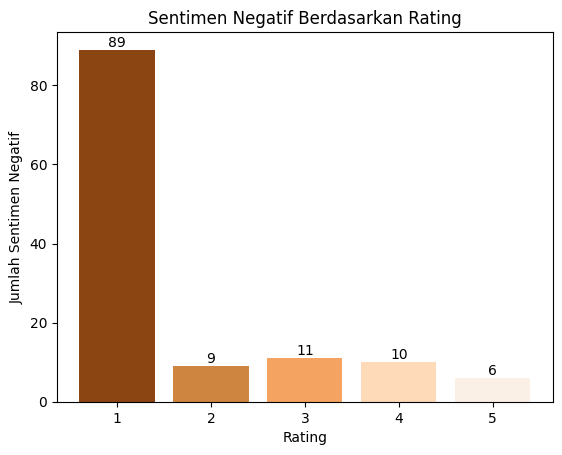

In [ ]:
import matplotlib.pyplot as plt

# Filter data berdasarkan sentimen negatif
negatif_df = jago_df[jago_df['sentiment'] == 'negatif']

# Hitung jumlah sentimen negatif untuk setiap rating
negatif_counts = negatif_df['score'].value_counts()

# Urutkan indeks (rating) agar sesuai urutan pada sumbu x
negatif_counts = negatif_counts.reindex(range(1, 6), fill_value=0)

# Daftar warna untuk setiap batang (bisa disesuaikan)
colors = ['saddlebrown', 'peru', 'sandybrown', 'peachpuff', 'linen']

# Plot grafik dengan warna yang telah ditentukan
plt.bar(negatif_counts.index, negatif_counts.values, color=colors)

plt.xlabel('Rating')
plt.ylabel('Jumlah Sentimen Negatif')
plt.title('Sentimen Negatif Berdasarkan Rating')

# Menambahkan keterangan jumlah di atas setiap bar
for x, y in zip(negatif_counts.index, negatif_counts.values):
    plt.text(x, y + 0, str(y), ha='center', va='bottom')

plt.show()

In [ ]:
import pandas as pd

# Define the total number of negative sentiments
total_negative_sentiments = 125

# Define the number of negative sentiments for each rating
negative_sentiments_rating1 = total_negative_sentiments // 3
negative_sentiments_rating2 = total_negative_sentiments // 3
negative_sentiments_rating3 = total_negative_sentiments // 3

# Calculate any remaining negative sentiments
remaining_negative_sentiments = total_negative_sentiments % 3

# Distribute the remaining negative sentiments to the first rating
negative_sentiments_rating1 += remaining_negative_sentiments

# Create a dictionary with the data
negative_sentiments_data = {
    'Rating': [1] * negative_sentiments_rating1 + [2] * negative_sentiments_rating2 + [3] * negative_sentiments_rating3,
    'Sentiment': 'negatif'
}

# Convert the data to a DataFrame
negative_sentiments_df = pd.DataFrame(negative_sentiments_data)

# Display the first few rows of the DataFrame
print(negative_sentiments_df.head())

   Rating Sentiment
0       1   negatif
1       1   negatif
2       1   negatif
3       1   negatif
4       1   negatif


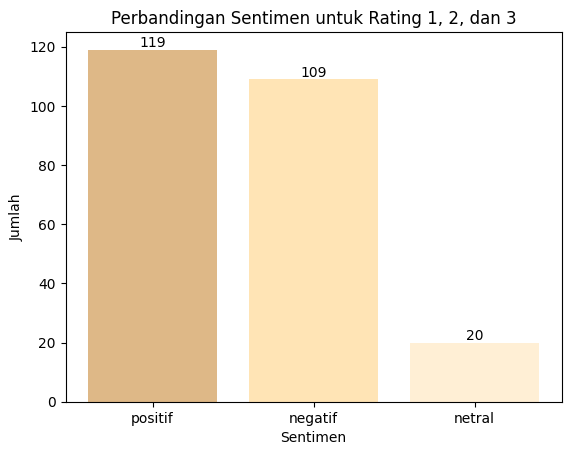

In [ ]:
import matplotlib.pyplot as plt

# Filter data based on ratings 1, 2, and 3
ratings_1_2_3_df = jago_df[jago_df['score'].isin([1, 2, 3])]

# Calculate the counts of sentiments for each rating
sentiment_counts = ratings_1_2_3_df['sentiment'].value_counts()

# Define the order of sentiments
sentiment_order = ['positif', 'negatif', 'netral']

# Define colors for each sentiment (customize as needed)
colors = ['burlywood', 'moccasin', 'papayawhip']

# Plot the chart
plt.bar(sentiment_order, [sentiment_counts[sentiment] for sentiment in sentiment_order], color=colors)

plt.xlabel('Sentimen')
plt.ylabel('Jumlah')
plt.title('Perbandingan Sentimen untuk Rating 1, 2, dan 3')

# Add labels above each bar
for x, y in zip(sentiment_order, [sentiment_counts[sentiment] for sentiment in sentiment_order]):
    plt.text(x, y + 0, str(y), ha='center', va='bottom')

plt.show()


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# Load your DataFrame
jago_df = pd.read_csv('preprocessing_jago_translated1.csv')

# Initialize the SentimentIntensityAnalyzer
sentiments = SentimentIntensityAnalyzer()

# Calculate sentiment scores for each text and add them to the DataFrame
jago_df['Compound'] = [sentiments.polarity_scores(text)['compound'] for text in jago_df['dataClean_english']]

# Filter texts with negative sentiment (you can adjust the threshold as needed)
negative_texts = jago_df[jago_df['Compound'] < 0]

# Tokenize the negative texts into unigrams (single words)
negative_unigrams = ' '.join(negative_texts['dataClean_english']).split()

# Calculate the frequency of unigrams
unigram_freq = nltk.FreqDist(negative_unigrams)

# Get the most common unigrams
most_common_unigrams = unigram_freq.most_common(50)  # Change 10 to the desired number of top unigrams

# Print the most common unigrams and their frequencies
for unigram, frequency in most_common_unigrams:
    print(f"{unigram}: {frequency}")

the: 209
it: 102
is: 91
to: 68
application: 50
account: 44
in: 36
bank: 29
really: 27
for: 26
money: 26
password: 26
wrong: 25
number: 24
doesn: 24
cellphone: 23
difficult: 23
bad: 21
but: 21
of: 21
email: 19
jago: 19
you: 19
good: 18
balance: 18
no: 17
just: 17
and: 17
when: 17
not: 16
that: 16
login: 16
enter: 16
data: 16
failed: 16
card: 15
was: 15
log: 15
cs: 14
strange: 14
try: 14
are: 14
an: 13
lost: 12
my: 12
have: 11
service: 11
if: 11
using: 11
complicated: 11


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
# Define the list of most common unigrams
most_common_unigrams = [
    ('the', 207),
    ('it', 104),
    ('is', 89),
    ('to', 67),
    ('application', 50),
    ('account', 44),
    ('in', 36),
    ('bank', 29),
    ('really', 27),
    ('for', 26),
    ('money',  26),
    ('password', 26),
    ('wrong', 25),
    ('number', 24),
    ('difficult', 23),
    ('doesn', 22),
    ('cellphone', 21),
    ('bad', 21),
    ('but', 21),
    ('of', 21),
    ('but', 21),
    ('email', 19),
    ('you', 19),
    ('good', 18),
    ('just', 17),
    ('and', 17),
    ('when', 17),
    ('that', 16),
    ('login', 16),
    ('enter', 16),
    ('data', 16),
    ('card', 15),
    ('was', 15),
    ('log', 15),
    ('cs', 14),
    ('strange', 14),
    ('are', 14),
    ('an', 13),
    ('my', 12),
    ('have', 11),
    ('if', 11),
    ('using', 11),
]

# Define your list of custom words to remove
custom_words_to_remove = ['the', 'it', 'is', 'to', 's', 'bank', 'really', 'for', 'application', 'money', 'jago', 'number', 'cellphone', 'but', 'of', 'email', 'you', 'good', 'balance', 'jago', 'no', 'just', 'and', 'when', 'that', 'enter', 'card', 'data', 'cards', 'was', 'log', 'cs', 'strange', 'in', 'are', 'an', 'my', 'have', 'if', 'using']

# Remove the custom words from the most common unigrams
filtered_unigrams = [(word, frequency) for word, frequency in most_common_unigrams if word not in custom_words_to_remove]

# Print the most common unigrams after custom word removal
for word, frequency in filtered_unigrams:
    print(f"{word}: {frequency}")


account: 44
password: 26
wrong: 25
difficult: 23
doesn: 22
bad: 21
login: 16


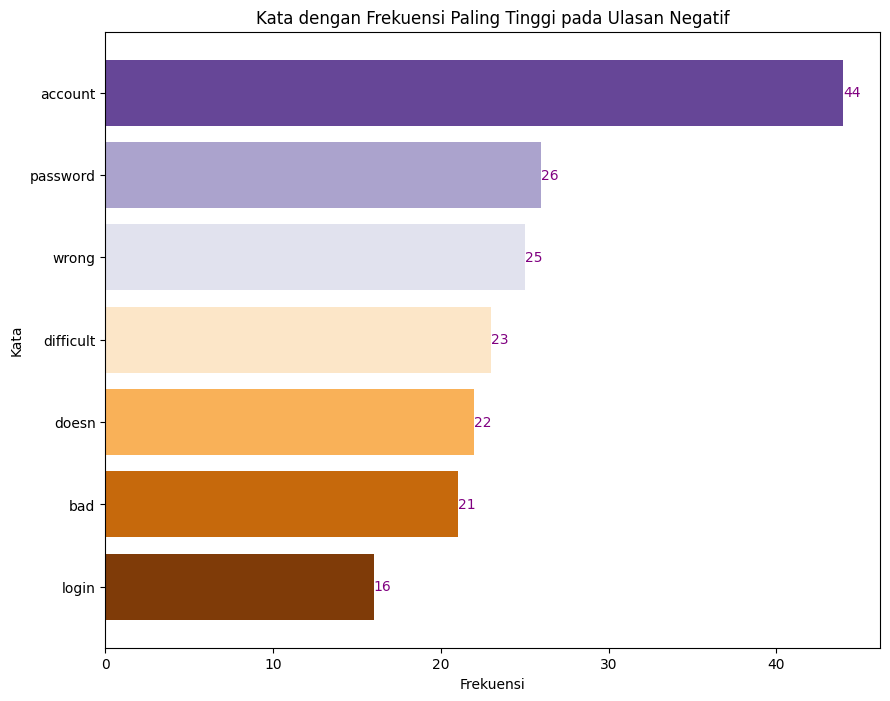

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort the filtered unigrams by frequency in ascending order
filtered_unigrams.sort(key=lambda x: x[1])

# Extract the words and frequencies from the filtered unigrams
words, frequencies = zip(*filtered_unigrams)

# Define a colormap for the color gradient
colormap = plt.get_cmap('PuOr')
colors = [colormap(i / len(words)) for i in range(len(words))]

# Create a horizontal bar chart with color gradient
plt.figure(figsize=(10, 8))
bars = plt.barh(words, frequencies, color=colors)

# Add labels to the bars
for word, frequency, bar in zip(words, frequencies, bars):
    plt.text(frequency, word, str(frequency), ha='left', va='center', color='purple')

# Set axis labels and a title
plt.xlabel('Frekuensi')
plt.ylabel('Kata')
plt.title('Kata dengan Frekuensi Paling Tinggi pada Ulasan Negatif')

# Show the bar chart
plt.show()

- visualisasi

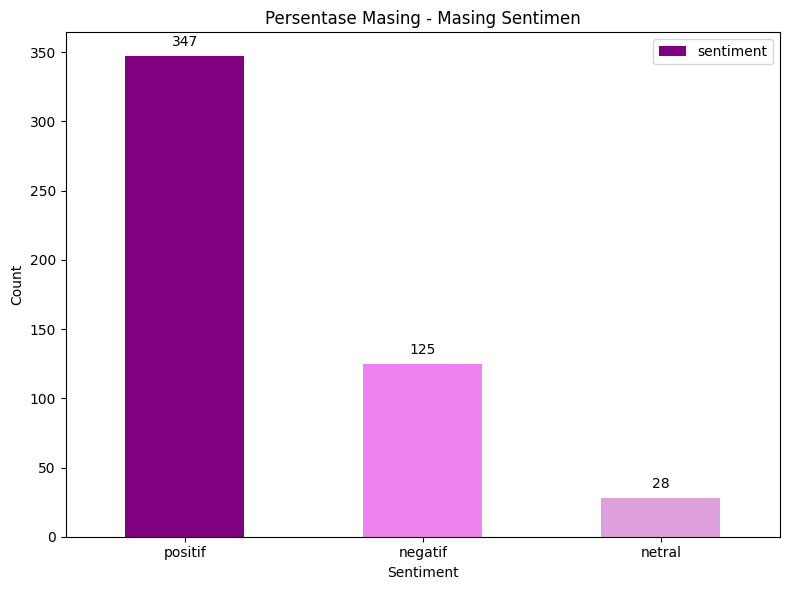

In [ ]:
import matplotlib.pyplot as plt

# Calculate sentiment counts
sentiment_counts = jago_df['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['purple', 'violet', 'plum'])

# Add labels and title
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Persentase Masing - Masing Sentimen')
plt.xticks(rotation=0)
plt.legend()

# Add count annotations on top of bars
for i, count in enumerate(sentiment_counts):
    plt.text(i, count + 5, str(count), ha='center', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

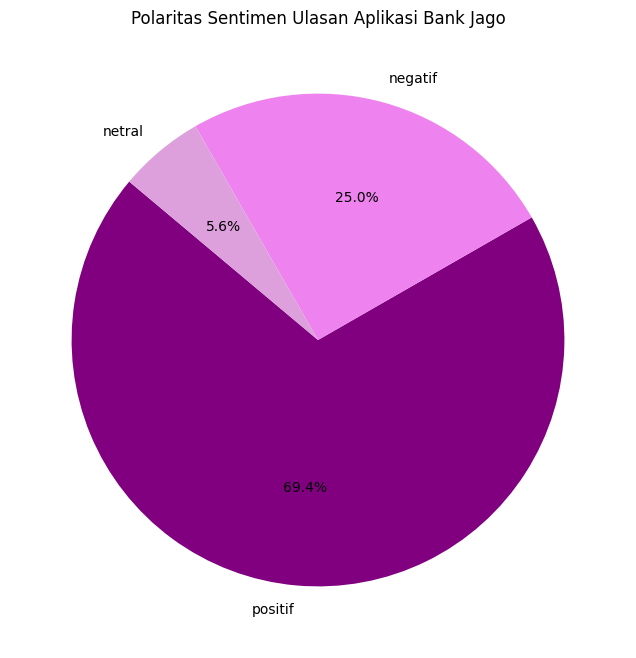

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = jago_df['sentiment'].value_counts()

# Define custom colors for each sentiment category
custom_colors = ['purple', 'violet', 'plum']

# Create a pie chart with a border
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=custom_colors, wedgeprops=border_props)
plt.title('Polaritas Sentimen Ulasan Aplikasi Bank Jago')
plt.show()

In [ ]:
#wordcloud all sentiment
!pip install wordcloud

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
jago_n = jago_df[(jago_df['score']==1) | (jago_df['score']==2)]
jago_neu = jago_df[(jago_df['score']==3)]
jago_p = jago_df[(jago_df['score']==4) | (jago_df['score']==5)]

#convert to list
negative_list = jago_n['dataClean_english'].tolist()
neutral_list = jago_neu['dataClean_english'].tolist()
positive_list = jago_p['dataClean_english'].tolist()

filtered_negative = ("").join(str(negative_list))
filtered_negative = filtered_negative.lower()

filtered_neutral = ("").join(str(neutral_list ))
filtered_neutral = filtered_neutral.lower()

filtered_positive = ("").join(str(positive_list))
filtered_positive = filtered_positive.lower()

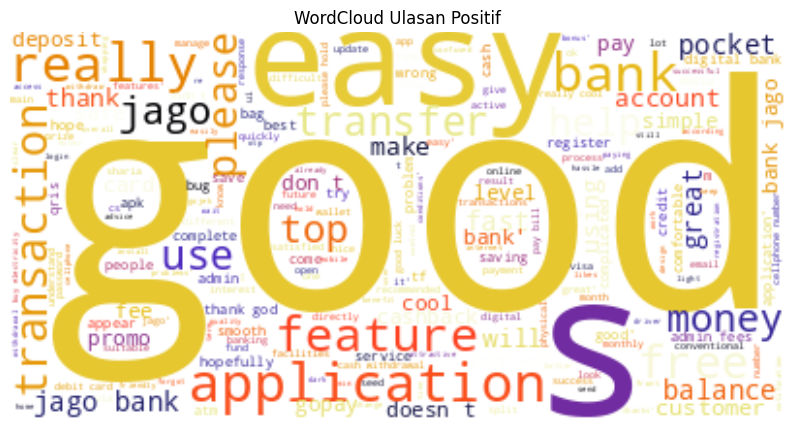

In [ ]:
#wordcloud positive
wordcloud = WordCloud(max_font_size = 160, margin = 0, background_color = 'white', colormap = 'CMRmap').generate(filtered_positive)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.title('WordCloud Ulasan Positif')
plt.show()

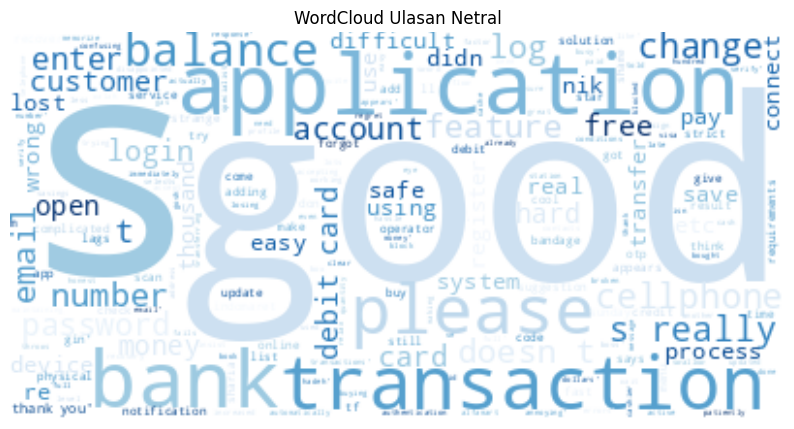

In [ ]:
#wordcloud neutral
wordcloud = WordCloud(max_font_size = 160, margin = 0, background_color = 'white', colormap = 'Blues').generate(filtered_neutral)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.title('WordCloud Ulasan Netral')
plt.show()

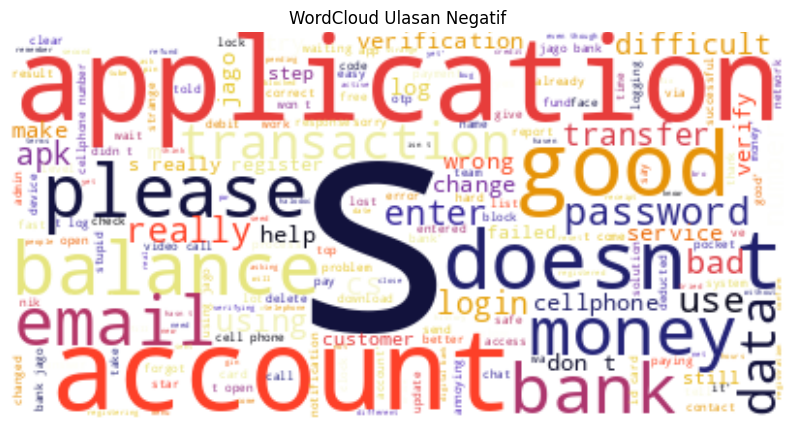

In [ ]:
#wordcloud negative
wordcloud = WordCloud(max_font_size = 160, margin = 0, background_color = 'white', colormap = 'CMRmap').generate(filtered_negative)
plt.figure(figsize=[10,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.margins(x = 0, y = 0)
plt.title('WordCloud Ulasan Negatif')
plt.show()

- N-Grams with Python

In [ ]:
import itertools
import collections

# Tokenize the text in the 'dataClean_english' column and convert to lowercase
word_list = [text.split() for text in jago_df['dataClean_english'].str.lower()]

# Flatten the list of words
all_word_list = list(itertools.chain(*word_list))

# Count the words
count_words = collections.Counter(all_word_list)

# Get the 10 most common words
most_common_words = count_words.most_common(40)
print(most_common_words)

[('the', 729), ('it', 366), ('is', 300), ('to', 265), ('s', 241), ('good', 207), ('bank', 203), ('i', 174), ('t', 169), ('application', 164), ('a', 161), ('jago', 127), ('in', 123), ('you', 121), ('really', 113), ('for', 109), ('easy', 105), ('account', 104), ('of', 94), ('please', 89), ('and', 80), ('money', 76), ('that', 75), ('balance', 72), ('not', 71), ('doesn', 65), ('use', 61), ('but', 55), ('number', 55), ('transactions', 55), ('thank', 55), ('using', 54), ('at', 54), ('free', 54), ('transfer', 53), ('like', 53), ('are', 53), ('up', 53), ('be', 52), ('no', 51)]


In [ ]:
custom_words_removal = ['the', 'it', 'is', 'to', 's', 'bank', 'i', 't', 'application', 'a', 'jago', 'in', 'you', 'really', 'for', 'account', 'of', 'and', 'money', 'that', 'not', 'doesn', 'use', 'but', 'number', 'transactions', 'using', 'at', 'transfer', 'are', 'up', 'be', 'no']
dataClean_english2 = [[w for w in word if not w in custom_words_removal] for word in word_list]

all_word_list_v2 = list(itertools.chain(*dataClean_english2))
counts_word_v2 = collections.Counter(all_word_list_v2)

counts_word_v2.most_common(7)

[('good', 207),
 ('easy', 105),
 ('please', 89),
 ('balance', 72),
 ('thank', 55),
 ('free', 54),
 ('like', 53)]

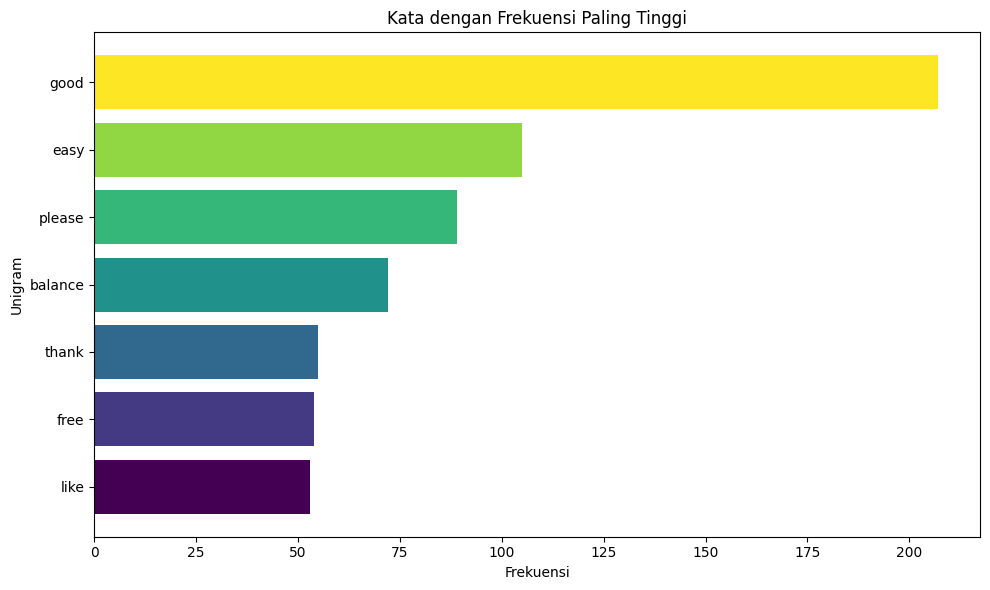

In [ ]:
import itertools
import collections
import matplotlib.pyplot as plt
import numpy as np

# Define custom stop words to remove
custom_words_removal = ['the', 'it', 'is', 'to', 's', 'bank', 'i', 't', 'application', 'a', 'jago', 'in', 'you', 'really', 'for', 'account', 'of', 'and', 'money', 'that', 'not', 'doesn', 'use', 'but', 'number', 'transactions', 'using', 'at', 'transfer', 'are', 'up', 'be', 'no']

# Tokenize the text in the 'dataClean_english' column and convert to lowercase
word_list = [text.split() for text in jago_df['dataClean_english'].str.lower()]

# Remove custom-defined stop words
dataClean_english2 = [[w for w in word if not w in custom_words_removal] for word in word_list]

# Flatten the list of words
all_word_list_v2 = list(itertools.chain(*dataClean_english2))

# Count the words
counts_word_v2 = collections.Counter(all_word_list_v2)

# Get the 10 most common words after removing custom stop words
most_common_words_v2 = counts_word_v2.most_common(7)

# Sort the words and counts in ascending order
most_common_words_v2 = sorted(most_common_words_v2, key=lambda x: x[1])

# Unpack the most common words and counts
words, counts = zip(*most_common_words_v2)

# Create a color gradient using a colormap
colors = plt.cm.viridis(np.linspace(0, 1, len(words)))

# Create a horizontal bar chart with a color gradient
plt.figure(figsize=(10, 6))
plt.barh(words, counts, color=colors)
plt.xlabel('Frekuensi')
plt.ylabel('Unigram')
plt.title('Kata dengan Frekuensi Paling Tinggi')
plt.tight_layout()
plt.show()


In [ ]:
from nltk import bigrams
from nltk import trigrams
from nltk.util import ngrams
from IPython.display import display, HTML

terms_bigram = [list(bigrams(jago_df)) for jago_df in dataClean_english2]

bigrams = list(itertools.chain(*terms_bigram))

bigram_counts = collections.Counter(bigrams)

bigram_counts.most_common(30)
bigram_df = pd.DataFrame(bigram_counts.most_common(30), columns=['Bigram', 'Count'])

print('\nBigram results: ')
display(bigram_df.head)


Bigram results: 


<bound method NDFrame.head of                  Bigram  Count
0           (has, been)     14
1          (thank, god)     13
2         (admin, fees)     13
3        (please, help)     11
4         (debit, card)     11
5          (those, who)     10
6         (cell, phone)     10
7            (id, card)     10
8          (help, with)     10
9           (hard, log)      9
10   (easy, understand)      9
11        (free, admin)      8
12         (good, easy)      8
13  (customer, service)      7
14        (video, call)      7
15       (good, please)      7
16           (help, me)      7
17           (hold, on)      7
18         (easy, easy)      7
19       (please, good)      7
20      (my, cellphone)      7
21         (very, good)      6
22    (wrong, password)      6
23           (tell, me)      6
24         (good, luck)      6
25       (even, though)      6
26  (cash, withdrawals)      6
27       (simple, easy)      5
28        (thank, good)      5
29           (give, me)      5>